In [563]:
colors = {
    'white': 0,
    'black': 1,
}
figures = {
    'Pawn': 1,
    'Rook': 2,
    'Knight': 3,
    'Bishop': 4,
    'Queen': 5,
    'King': 6,
}
reverse_figures = {v: k[0] for k, v in figures.items()}



In [564]:
import copy
import numpy as np

In [565]:
class Piece:
    def __init__(self, color, position):
        self.color = color
        self.position = position
        self.eliminated = False
        self.destructable = True


    def eliminate(self):
        self.eliminated = True

    def valid_moves(self, board_instance):
        return []


In [566]:
class Pawn(Piece):
    def __init__(self, color, position):
        super().__init__(color, position)
        self.first_move = True
        self.figure = figures['Pawn']

    def valid_moves(self, board_instance):
        moves = []
        row, col = self.position

        if self.color == colors['white']:
            if row == 1 and board_instance.check_for_empty((row + 2, col)) and board_instance.check_for_empty((row + 1, col)):
                moves.append((row + 2, col))
            if row + 1 < 8 and board_instance.check_for_empty((row + 1, col)):
                moves.append((row + 1, col))
            dc = [[1, 1], [1, -1]]
            for i in range(2):
                new_row, new_col = row + dc[i][0], col + dc[i][1]
                if 0 <= new_row < 8 and 0 <= new_col < 8 and board_instance.check_for_enemy((new_row, new_col), self.color):
                    moves.append((new_row, new_col))

        if self.color == colors['black']:
            if row == 6 and board_instance.check_for_empty((row - 2, col)) and board_instance.check_for_empty((row - 1, col)):
                moves.append((row - 2, col))
            if row - 1 >= 0 and board_instance.check_for_empty((row - 1, col)):
                moves.append((row - 1, col))
            dc = [[-1, 1], [-1, -1]]
            for i in range(2):
                new_row, new_col = row + dc[i][0], col + dc[i][1]
                if 0 <= new_row < 8 and 0 <= new_col < 8 and board_instance.check_for_enemy((new_row, new_col), self.color):
                    moves.append((new_row, new_col))

        return moves

In [567]:
class Rook(Piece):
    def __init__(self, color, position):
        super().__init__(color, position)
        self.first_move = True
        self.figure = figures['Rook']

    def valid_moves(self, board_instance):
        moves = []
        row, col = self.position

        directions = [[1, 0], [-1, 0], [0, 1], [0, -1]]

        for dr,dc in directions:
            r,c = row +dr , col + dc
            while 0 <= r < 8 and 0 <= c < 8:

                if board_instance.check_for_friendly((r,c), self.color):
                    break
                moves.append((r,c))
                if board_instance.check_for_enemy((r,c), self.color):
                    break
                r += dr
                c += dc

        return moves


In [568]:
class Knight(Piece):
    def __init__(self, color, position):
        super().__init__(color, position)
        self.figure = figures['Knight']

    def valid_moves(self, board_instance):
        moves = []
        row, col = self.position

        dc = [[1, 2], [1, -2], [-1, 2], [-1, -2], [2, 1], [2, -1], [-2, 1], [-2, -1]]

        for i in range(8):
            new_row, new_col = row + dc[i][0], col + dc[i][1]
            if 0 <= new_row < 8 and 0 <= new_col < 8 and not board_instance.check_for_friendly((new_row, new_col), self.color):
                moves.append((new_row, new_col))

        return moves

In [569]:
class Bishop(Piece):
    def __init__(self, color, position):
        super().__init__(color, position)
        self.figure = figures['Bishop']

    def valid_moves(self, board_instance):
        moves = []
        row, col = self.position

        directions = [[1, 1], [1, -1], [-1, 1], [-1, -1]]

        for dr, dc in directions:
            r, c = row + dr, col + dc
            while 0 <= r < 8 and 0 <= c < 8:
                if board_instance.check_for_friendly((r, c), self.color):
                    break
                moves.append((r, c))
                if board_instance.check_for_enemy((r, c), self.color):
                    break
                r += dr
                c += dc

        return moves

In [570]:
class Queen(Piece):
    def __init__(self, color, position):
        super().__init__(color, position)
        self.figure = figures['Queen']

    def valid_moves(self, board_instance):
        moves = []
        row, col = self.position

        directions = [[1, 0], [-1, 0], [0, 1], [0, -1], [1, 1], [1, -1], [-1, 1], [-1, -1]]

        for dr, dc in directions:
            r, c = row + dr, col + dc
            while 0 <= r < 8 and 0 <= c < 8:
                if board_instance.check_for_friendly((r, c), self.color):
                    break
                moves.append((r, c))
                if board_instance.check_for_enemy((r, c), self.color):
                    break
                r += dr
                c += dc

        return moves



In [571]:
class King(Piece):
    def __init__(self, color, position):
        super().__init__(color, position)
        self.figure = figures['King']
        self.destructable = False

    def valid_moves(self, board_instance):
        moves = []
        row, col = self.position

        dc = [[1, 0], [-1, 0], [0, 1], [0, -1], [1, 1], [1, -1], [-1, 1], [-1, -1]]

        for i in range(8):
            new_row, new_col = row + dc[i][0], col + dc[i][1]
            if 0 <= new_row < 8 and 0 <= new_col < 8 and not board_instance.check_for_friendly((new_row, new_col), self.color):
                moves.append((new_row, new_col))

        # restricted moves
        enemy_moves = board_instance.enemy_moves(self.color)
        king_position = board_instance.get_enemy_king_position(self.color)
        if king_position:
            restricted_positions = []
            king_dc = [[1, 0], [-1, 0], [0, 1], [0, -1], [1, 1], [1, -1], [-1, 1], [-1, -1]]
            king_row, king_col = king_position
            for dr, dc in king_dc:
                new_row, new_col = king_row + dr, king_col + dc
                if 0 <= new_row < 8 and 0 <= new_col < 8:
                    restricted_positions.append((new_row, new_col))

            moves = [move for move in moves if move not in restricted_positions]
        moves = [move for move in moves if move not in enemy_moves]

        valid_moves = []
        for move in moves:
            future_board = copy.deepcopy(board_instance)
            future_board.board[move[0]][move[1]] = self
            future_board.board[row][col] = None
            future_enemy_moves = future_board.future_enemy_moves(self.color)
            if move not in future_enemy_moves:
                valid_moves.append(move)

        return valid_moves


In [572]:
class Board:
    def __init__(self):
        self.board = self.create_board()
        self.populate_board()
        self.captured_pieces = []
        self.tmp_board = np.copy(self.board)

    def create_board(self):
        return np.array([[None for _ in range(8)] for _ in range(8)])

    def populate_board(self):
        self.place_pieces(Pawn, 1, colors['white'])
        self.place_pieces(Pawn, 6, colors['black'])
        self.place_pieces(Rook, 0, colors['white'], [0, 7])
        self.place_pieces(Rook, 7, colors['black'], [0, 7])
        self.place_pieces(Knight, 0, colors['white'], [1, 6])
        self.place_pieces(Knight, 7, colors['black'], [1, 6])
        self.place_pieces(Bishop, 0, colors['white'], [2, 5])
        self.place_pieces(Bishop, 7, colors['black'], [2, 5])
        self.place_pieces(Queen, 0, colors['white'], [3])
        self.place_pieces(Queen, 7, colors['black'], [3])
        self.place_pieces(King, 0, colors['white'], [4])
        self.place_pieces(King, 7, colors['black'], [4])

    def is_changed(self):
        if not np.array_equal(self.board, self.tmp_board):
            self.tmp_board = np.copy(self.board)
            return True
        return False

    def place_pieces(self, piece_class, row, color, cols=None):
        if cols is None:
            for col in range(8):
                self.board[row][col] = piece_class(color, (row, col))
        else:
            for col in cols:
                self.board[row][col] = piece_class(color, (row, col))

    def move_piece(self, start_pos, end_pos):
        piece = self.get_piece(start_pos)
        if not piece:
            return False
        if end_pos not in piece.valid_moves(self):
            return False
        target_piece = self.get_piece(end_pos)
        if target_piece:
            if isinstance(target_piece, King):
                return False
            if target_piece.color != piece.color:
                target_piece.eliminate()
                self.captured_pieces.append(target_piece)

        self.board[start_pos[0]][start_pos[1]] = None
        piece.position = end_pos
        self.board[end_pos[0]][end_pos[1]] = piece
        return True

    def show_board(self):
        print("  " + " ".join(str(x) for x in range(8)))
        for y, row in enumerate(self.board):
            print(f"{y} " + " ".join([reverse_figures[piece.figure] if piece else '.' for piece in row]))

    def get_piece(self, position):
        row, col = position
        return self.board[row][col]

    def check_for_enemy(self, position, color):
        piece = self.get_piece(position)
        return piece and piece.color != color

    def check_for_friendly(self, position, color):
        piece = self.get_piece(position)
        return piece and piece.color == color

    def check_for_empty(self, position):
        return not self.get_piece(position)

    def get_moves(self, color):
        color_value = colors[color]  # Convert color to its corresponding integer value
        moves = []
        for row in range(8):
            for col in range(8):
                piece = self.get_piece((row, col))
                if piece and piece.color == color_value:
                    piece_moves = piece.valid_moves(self)
                    for move in piece_moves:
                        moves.append([(row, col), move])
        return moves

    def enemy_moves(self, color):
        moves = []
        for row in range(8):
            for col in range(8):
                piece = self.get_piece((row, col))
                if piece and piece.color != color and not isinstance(piece, King):
                    piece_moves = piece.valid_moves(self)
                    if isinstance(piece, Pawn):
                        piece_moves = self.filter_pawn_moves(piece, piece_moves, row, col)
                    for move in piece_moves:
                        moves.append([(row, col), move])
        return moves

    def filter_pawn_moves(self, piece, piece_moves, row, col):
        if piece.color == colors['white']:
            return [move for move in piece_moves if not (move[0] == row + 1 and move[1] == col) and not (move[0] == row + 2 and move[1] == col)]
        elif piece.color == colors['black']:
            return [move for move in piece_moves if not (move[0] == row - 1 and move[1] == col) and not (move[0] == row - 2 and move[1] == col)]
        return piece_moves

    def future_enemy_moves(self, color):
        return self.enemy_moves(color)

    def get_enemy_king_position(self, color):
        for row in range(8):
            for col in range(8):
                piece = self.get_piece((row, col))
                if piece and isinstance(piece, King) and piece.color != color:
                    return (row, col)
        return None

    def enemy_king_moves(self, color):
        enemy_king_position = self.get_enemy_king_position(color)
        if enemy_king_position:
            enemy_king = self.get_piece(enemy_king_position)
            if isinstance(enemy_king, King):
                return enemy_king.valid_moves(self)
        return []

    def get_king_position(self, color):
        color_value = colors[color]  # Convert color to its corresponding integer value
        for row in range(8):
            for col in range(8):
                piece = self.get_piece((row, col))
                if piece and isinstance(piece, King) and piece.color == color_value:
                    return (row, col)
        return None

    def is_check(self, color):
        king_position = self.get_king_position(color)
        checking_pieces = []
        enemy_moves = self.get_moves('white' if color == 'black' else 'black')
        for move in enemy_moves:
            if move[1] == king_position:
                checking_pieces.append(self.get_piece(move[0]))

        return bool(checking_pieces), checking_pieces

    def check_for_check_mate(self, color, valid_moves):
        in_check, checking_pieces = self.is_check(color)
        if in_check and len(valid_moves) == 0:
            return True
        return False

    def check_for_pat(self, color, valid_moves):
        in_check, _ = self.is_check(color)
        if not in_check and len(valid_moves) == 0:
            return True
        return False

    def translate_to_matrix(self):

        pawn_matrix = np.zeros((8, 8), dtype=int)
        rook_matrix = np.zeros((8, 8), dtype=int)
        knight_matrix = np.zeros((8, 8), dtype=int)
        bishop_matrix = np.zeros((8, 8), dtype=int)
        queen_matrix = np.zeros((8, 8), dtype=int)
        king_matrix = np.zeros((8, 8), dtype=int)

        for row in range(8):
            for col in range(8):
                piece = self.get_piece((row, col))
                if piece:
                    value = 1 if piece.color == colors['white'] else -1
                    if isinstance(piece, Pawn):
                        pawn_matrix[row, col] = value
                    elif isinstance(piece, Rook):
                        rook_matrix[row, col] = value
                    elif isinstance(piece, Knight):
                        knight_matrix[row, col] = value
                    elif isinstance(piece, Bishop):
                        bishop_matrix[row, col] = value
                    elif isinstance(piece, Queen):
                        queen_matrix[row, col] = value
                    elif isinstance(piece, King):
                        king_matrix[row, col] = value

        board_matrix = np.array([pawn_matrix, rook_matrix, knight_matrix, bishop_matrix, queen_matrix, king_matrix])

        return board_matrix

In [573]:
board = Board()
board.populate_board()

In [574]:
board_matrix = board.translate_to_matrix()
print(board_matrix.shape)

(6, 8, 8)


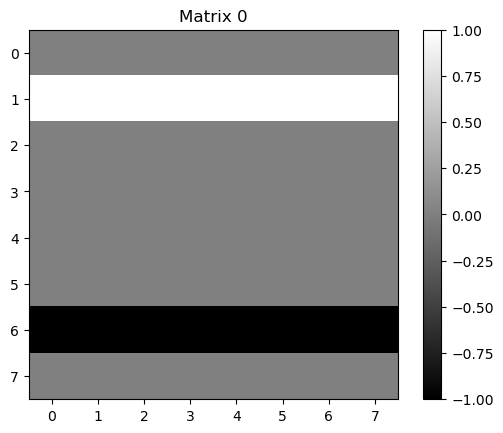

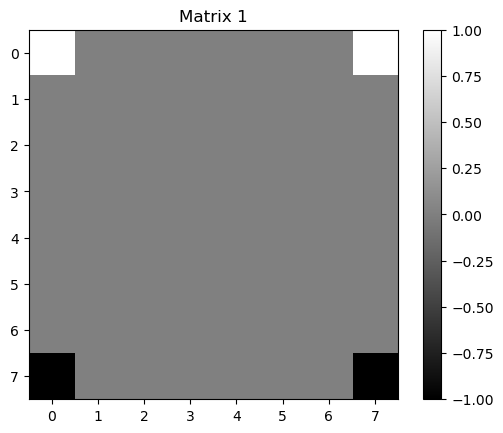

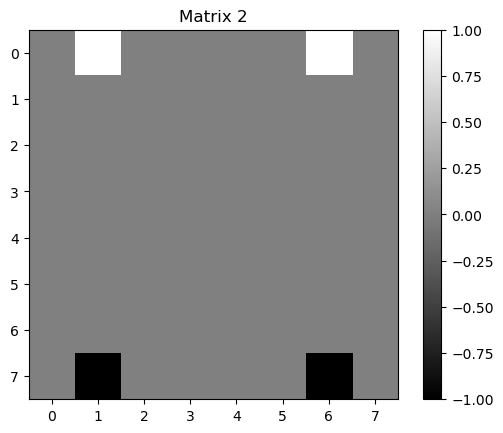

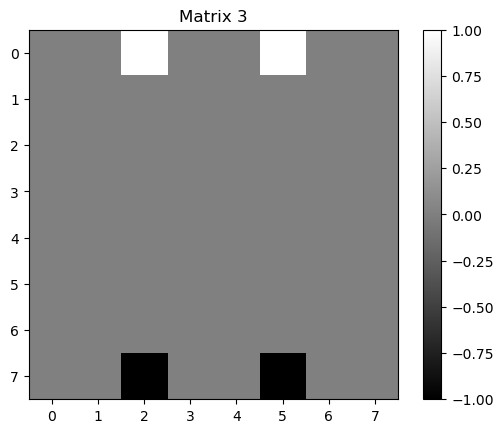

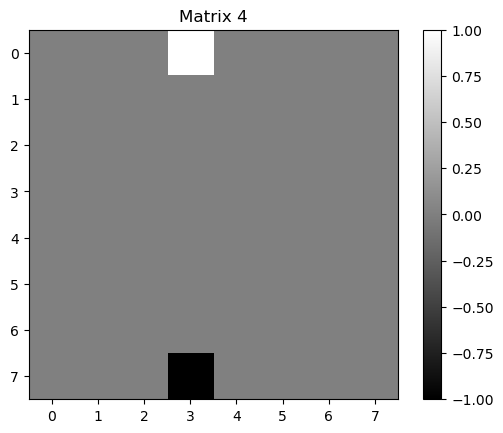

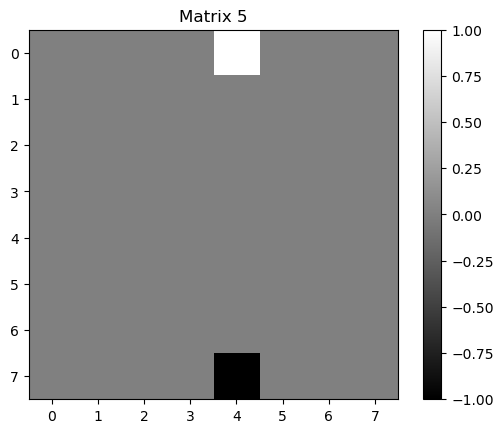

In [575]:
import matplotlib.pyplot as plt

# Assuming board_matrix is already defined
num_matrices = board_matrix.shape[0]

for i in range(num_matrices):
    matrix = board_matrix[i]
    plt.figure()
    plt.imshow(matrix, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.title(f'Matrix {i}')
    plt.show()

In [576]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ChessRLNet(nn.Module):
    def __init__(self):
        super(ChessRLNet, self).__init__()

        # Convolutional layers (feature extraction)
        self.conv1 = nn.Conv2d(in_channels=6, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)

        # Fully connected layers (decision making)
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 256)

        # Output heads (start and end position selection)
        self.start_pos_head = nn.Linear(256, 64)  # 8x8=64
        self.end_pos_head = nn.Linear(256, 64)    # 8x8=64

    def forward(self, x):
        # Convolutional layers with ReLU
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))

        # Flatten for fully connected layers
        x = x.view(x.shape[0], -1)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        # Output: Start and End Position Probability Distribution
        start_pos = F.softmax(self.start_pos_head(x), dim=1)  # Softmax for probabilities
        end_pos = F.softmax(self.end_pos_head(x), dim=1)

        # Reshape back to 8x8
        start_pos = start_pos.view(-1, 8, 8)
        end_pos = end_pos.view(-1, 8, 8)

        return start_pos, end_pos

# Create an instance of the model
chess_net = ChessRLNet()
optimizer = torch.optim.Adam(chess_net.parameters(), lr=0.001)
print(chess_net)


ChessRLNet(
  (conv1): Conv2d(6, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=8192, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (start_pos_head): Linear(in_features=256, out_features=64, bias=True)
  (end_pos_head): Linear(in_features=256, out_features=64, bias=True)
)


In [577]:
class Evaluate:
    def __init__(self):
        # Piece weight assignments for base value (scaled from 0-1 where necessary)
        self.piece_weights = {
            'Pawn': 0.1,
            'Knight': 0.3,
            'Bishop': 0.3,
            'Rook': 0.5,
            'Queen': 1.0,
            'King': 0.0  # King doesn't have a weighted base value
        }

        # Position-based bonus weights for pieces (scaled 0 to 1)
        self.piece_position_weights = {
            'Pawn': [
                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                [0.05, 0.1, 0.1, 0.2, 0.2, 0.1, 0.1, 0.05],
                [0.1, 0.2, 0.2, 0.3, 0.3, 0.2, 0.2, 0.1],
                [0.2, 0.3, 0.4, 0.5, 0.5, 0.4, 0.3, 0.2],
                [0.25, 0.35, 0.5, 0.6, 0.6, 0.5, 0.35, 0.25],
                [0.3, 0.4, 0.6, 0.7, 0.7, 0.6, 0.4, 0.3],
                [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],  # Close to promotion (last two rows)
                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
            ],
            'Knight': [
                [0.0, 0.0, 0.1, 0.2, 0.2, 0.1, 0.0, 0.0],
                [0.0, 0.1, 0.2, 0.3, 0.3, 0.2, 0.1, 0.0],
                [0.1, 0.2, 0.3, 0.4, 0.4, 0.3, 0.2, 0.1],
                [0.2, 0.3, 0.4, 0.5, 0.5, 0.4, 0.3, 0.2],
                [0.2, 0.3, 0.4, 0.5, 0.5, 0.4, 0.3, 0.2],
                [0.1, 0.2, 0.3, 0.4, 0.4, 0.3, 0.2, 0.1],
                [0.0, 0.1, 0.2, 0.3, 0.3, 0.2, 0.1, 0.0],
                [0.0, 0.0, 0.1, 0.2, 0.2, 0.1, 0.0, 0.0]
            ],
            'Bishop': [
                [0.0, 0.1, 0.2, 0.3, 0.3, 0.2, 0.1, 0.0],
                [0.1, 0.2, 0.3, 0.4, 0.4, 0.3, 0.2, 0.1],
                [0.2, 0.3, 0.4, 0.5, 0.5, 0.4, 0.3, 0.2],
                [0.3, 0.4, 0.5, 0.6, 0.6, 0.5, 0.4, 0.3],
                [0.3, 0.4, 0.5, 0.6, 0.6, 0.5, 0.4, 0.3],
                [0.2, 0.3, 0.4, 0.5, 0.5, 0.4, 0.3, 0.2],
                [0.1, 0.2, 0.3, 0.4, 0.4, 0.3, 0.2, 0.1],
                [0.0, 0.1, 0.2, 0.3, 0.3, 0.2, 0.1, 0.0]
            ],
            'Rook': [
                [0.5, 0.6, 0.7, 0.8, 0.8, 0.7, 0.6, 0.5],
                [0.5, 0.6, 0.7, 0.8, 0.8, 0.7, 0.6, 0.5],
                [0.5, 0.6, 0.7, 0.8, 0.8, 0.7, 0.6, 0.5],
                [0.6, 0.7, 0.8, 0.9, 0.9, 0.8, 0.7, 0.6],
                [0.6, 0.7, 0.8, 0.9, 0.9, 0.8, 0.7, 0.6],
                [0.6, 0.7, 0.8, 0.9, 0.9, 0.8, 0.7, 0.6],
                [0.6, 0.7, 0.8, 0.9, 0.9, 0.8, 0.7, 0.6],
                [0.5, 0.6, 0.7, 0.8, 0.8, 0.7, 0.6, 0.5]
            ],
            'Queen': [
                [0.5, 0.6, 0.7, 0.8, 0.8, 0.7, 0.6, 0.5],
                [0.5, 0.6, 0.7, 0.8, 0.8, 0.7, 0.6, 0.5],
                [0.5, 0.6, 0.7, 0.8, 0.8, 0.7, 0.6, 0.5],
                [0.6, 0.7, 0.8, 0.9, 0.9, 0.8, 0.7, 0.6],
                [0.6, 0.7, 0.8, 0.9, 0.9, 0.8, 0.7, 0.6],
                [0.6, 0.7, 0.8, 0.9, 0.9, 0.8, 0.7, 0.6],
                [0.5, 0.6, 0.7, 0.8, 0.8, 0.7, 0.6, 0.5],
                [0.5, 0.6, 0.7, 0.8, 0.8, 0.7, 0.6, 0.5]
            ],
            'King': [
                [0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0],
                [0.0, 0.0, 0.2, 0.4, 0.4, 0.2, 0.0, 0.0],
                [0.0, 0.2, 0.4, 0.6, 0.6, 0.4, 0.2, 0.0],
                [0.2, 0.4, 0.6, 0.8, 0.8, 0.6, 0.4, 0.2],
                [0.2, 0.4, 0.6, 0.8, 0.8, 0.6, 0.4, 0.2],
                [0.0, 0.2, 0.4, 0.6, 0.6, 0.4, 0.2, 0.0],
                [0.0, 0.0, 0.2, 0.4, 0.4, 0.2, 0.0, 0.0],
                [0.0, 0.0, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0]
            ]
        }

    def evaluate_piece_control(self, piece, row, col):
        """Evaluates piece control by combining its weight and positional value."""
        piece_weight = self.reward_piece(piece)  # Base piece weight
        position_bonus = self.reward_positioning(piece, row, col)  # Positional bonus
        return piece_weight + position_bonus  # Combine both factors

    def reward_piece(self, piece):
        """Evaluates the reward based on the type of piece."""
        piece_type = piece.__class__.__name__
        weight = self.piece_weights.get(piece_type, 0)
        return weight  # Return just the piece's weight

    def reward_positioning(self, piece, row, col):
        """Evaluates the reward based on the position of the piece on the board."""
        piece_type = piece.__class__.__name__
        if piece_type in self.piece_position_weights:
            # Return the bonus value for the piece's position on the board (normalized 0-1)
            return self.piece_position_weights[piece_type][row][col]
        return 0  # Return 0 if no specific positional bonus for the piece

    def evaluate_side(self, board, player_color, valid_moves, enemy_valid_moves):
        """Evaluates the pieces and positioning on the board, including valid moves advantage."""
        player_value = 0
        opponent_value = 0

        # Evaluate the board position
        for row in range(8):
            for col in range(8):
                piece = board.get_piece((row, col))
                if piece:
                    control_value = self.evaluate_piece_control(piece, row, col)
                    if player_color == 'black':
                        player_color = 1
                    else:
                        player_color = 0
                    if piece.color == player_color:
                        player_value += control_value
                    else:
                        opponent_value += control_value

        # Add advantage based on valid moves
        player_valid_move_advantage = len(valid_moves)  # Number of valid moves for the player
        opponent_valid_move_advantage = len(enemy_valid_moves)  # Number of valid moves for the enemy
        # Difference in valid moves: more moves = more flexibility on the board
        valid_move_advantage = player_valid_move_advantage - opponent_valid_move_advantage
        return player_value - opponent_value + valid_move_advantage


In [ ]:
import pygame
import sys
import copy
from board import Board  # Import the Board class

class ChessGame:
    def __init__(self):
        self.WIDTH, self.HEIGHT = 800, 800
        self.ROWS, self.COLS = 8, 8
        self.SQUARE_SIZE = self.WIDTH // self.COLS

        self.WHITE = (255, 255, 255)
        self.BLACK = (0, 0, 0)
        self.LIGHT_BROWN = (240, 217, 181)
        self.DARK_BROWN = (181, 136, 99)
        self.BLUE = (0, 0, 255)
        self.RED = (255, 0, 0)

        self.WIN = pygame.display.set_mode((self.WIDTH, self.HEIGHT))
        pygame.display.set_caption('Chess')

        self.colors = {
            'white': 0,
            'black': 1,
        }
        self.figures = {
            'Pawn': 1,
            'Rook': 2,
            'Knight': 3,
            'Bishop': 4,
            'Queen': 5,
            'King': 6,
        }
        self.reverse_figures = {v: k[0] for k, v in self.figures.items()}

        self.IMAGES = self.load_images()

    def load_images(self):
        pieces = {
            'wp': 'white pawn',
            'bp': 'black pawn',
            'wr': 'white rook',
            'br': 'black rook',
            'wn': 'white knight',
            'bn': 'black knight',
            'wb': 'white bishop',
            'bb': 'black bishop',
            'wq': 'white queen',
            'bq': 'black queen',
            'wk': 'white king',
            'bk': 'black king'
        }
        images = {}
        for piece, name in pieces.items():
            file_name = name.replace(' ', '_') + '.png'
            try:
                images[piece] = pygame.transform.scale(pygame.image.load(f'images/{file_name}'), (self.SQUARE_SIZE, self.SQUARE_SIZE))
            except FileNotFoundError:
                print(f"File not found: images/{file_name}")
        return images

    def draw_board(self):
        self.WIN.fill(self.WHITE)
        for row in range(self.ROWS):
            for col in range(self.COLS):
                color = self.LIGHT_BROWN if (row + col) % 2 == 0 else self.DARK_BROWN
                pygame.draw.rect(self.WIN, color, (col * self.SQUARE_SIZE, row * self.SQUARE_SIZE, self.SQUARE_SIZE, self.SQUARE_SIZE))

    def draw_pieces(self, board):
        for row in range(self.ROWS):
            for col in range(self.COLS):
                piece = board[row][col]
                if piece:
                    piece_key = f"{'w' if piece.color == 0 else 'b'}{'n' if piece.__class__.__name__ == 'Knight' else piece.__class__.__name__[0].lower()}"
                    self.WIN.blit(self.IMAGES[piece_key], (col * self.SQUARE_SIZE, row * self.SQUARE_SIZE))

    def highlight_moves(self, piece_position, valid_moves):
        for move in valid_moves:
            if tuple(move[0]) == piece_position:
                row, col = move[1]
                pygame.draw.circle(self.WIN, self.BLUE, (col * self.SQUARE_SIZE + self.SQUARE_SIZE // 2, row * self.SQUARE_SIZE + self.SQUARE_SIZE // 2), self.SQUARE_SIZE // 4)

    def handle_mouse_button_up(self, board_instance, selected_piece, dragging, valid_moves):
        if dragging and selected_piece:
            pos = pygame.mouse.get_pos()
            col, row = pos[0] // self.SQUARE_SIZE, pos[1] // self.SQUARE_SIZE
            end_pos = [row, col]
            start_pos = list(selected_piece.position)
            if [start_pos, end_pos] in valid_moves:
                board_instance.move_piece(tuple(start_pos), tuple(end_pos))
                selected_piece.position = tuple(end_pos)
        return None, False

    def handle_mouse_button_down(self, board_instance, current_turn_color):
        pos = pygame.mouse.get_pos()
        col, row = pos[0] // self.SQUARE_SIZE, pos[1] // self.SQUARE_SIZE
        piece = board_instance.get_piece((row, col))
        if piece and piece.color == self.colors[current_turn_color]:
            selected_piece = piece
            dragging = True
            drag_offset_x = pos[0] - col * self.SQUARE_SIZE
            drag_offset_y = pos[1] - row * self.SQUARE_SIZE
            return selected_piece, dragging, drag_offset_x, drag_offset_y
        return None, False, 0, 0

    def handle_mouse_motion(self, dragging):
        col, row = -1, -1
        if dragging:
            pos = pygame.mouse.get_pos()
            col, row = pos[0] // self.SQUARE_SIZE, pos[1] // self.SQUARE_SIZE
        return col, row

    def select_move_from_output(self, nn_output, valid_moves):
        start_probs = nn_output[0].view(-1)
        end_probs = nn_output[1].view(-1)

        start_indices = torch.argsort(start_probs, descending=True)
        end_indices = torch.argsort(end_probs, descending=True)

        start_pos = None
        end_pos = None

        for start_idx in start_indices:
            start_pos = (start_idx // 8, start_idx % 8)
            filtered_valid_moves = [move for move in valid_moves if move[0] == list(start_pos)]

            if filtered_valid_moves:
                for end_idx in end_indices:
                    end_pos_candidate = (end_idx // 8, end_idx % 8)
                    if [list(start_pos), list(end_pos_candidate)] in filtered_valid_moves:
                        end_pos = end_pos_candidate
                        break
                if end_pos:
                    break

        if start_pos and end_pos:
            start_pos = (start_pos[0].item(), start_pos[1].item())
            end_pos = (end_pos[0].item(), end_pos[1].item())

        return start_pos, end_pos


    def main(self):
        max_turns = 150
        num_games = 100  # Number of games to play
        total_loss = 0

        for game_num in range(num_games):
            turn_iteration = 1
            board_instance = Board()
            board_instance.populate_board()
            turn = 1
            colors_turn = ['white', 'black']
            once = True

            while turn_iteration <= max_turns:
                moves = board_instance.get_moves(colors_turn[turn])
                moves_free_check = []
                for move in moves:
                    future_board = copy.deepcopy(board_instance)
                    start_pos = tuple(move[0])
                    end_pos = tuple(move[1])
                    future_board.move_piece(start_pos, end_pos)
                    if not future_board.is_check(colors_turn[turn])[0]:
                        moves_free_check.append([list(move[0]), list(move[1])])
                valid_moves = moves_free_check

                if once:
                    last_valid_moves = valid_moves
                    once = False

                reward = 0  # Initialize reward
                if board_instance.is_check(colors_turn[turn])[0]:
                    print(f"Check! {colors_turn[turn]} is in check!")
                    reward += 25
                if board_instance.check_for_check_mate(colors_turn[turn], valid_moves):
                    print(f"Checkmate! {colors_turn[turn]} is in checkmate!")
                    reward += 200
                    break
                elif board_instance.check_for_pat(colors_turn[turn], valid_moves):
                    print(f"Pat! {colors_turn[turn]} is in pat!")
                    break

                board_matrix = board_instance.translate_to_matrix()
                board_tensor = torch.tensor(board_matrix, dtype=torch.float32).unsqueeze(0)
                output = chess_net.forward(board_tensor)
                start_pos, end_pos = self.select_move_from_output(output, valid_moves)
                if start_pos and end_pos:
                    board_instance.move_piece(start_pos, end_pos)
                reward += Evaluate().evaluate_side(board_instance, colors_turn[turn], valid_moves, last_valid_moves) * 0.1
                optimizer.zero_grad()

                start_pos_probs, end_pos_probs = output
                start_pos_idx = start_pos[0] * 8 + start_pos[1]
                end_pos_idx = end_pos[0] * 8 + end_pos[1]
                start_pos_log_prob = torch.log(start_pos_probs.view(-1)[start_pos_idx])
                end_pos_log_prob = torch.log(end_pos_probs.view(-1)[end_pos_idx])
                # Calculate the loss
                loss = -(start_pos_log_prob + end_pos_log_prob) * reward
                loss.backward()
                optimizer.step()

                total_loss += loss.item()

                last_valid_moves = valid_moves
                turn = 1 if turn == 0 else 0
                turn_iteration += 1

            average_loss = total_loss / turn_iteration
            print(f"Game {game_num + 1} over. Max turns reached or checkmate/pat detected in {turn_iteration} turns.")
            print(f"Average loss after {game_num + 1} games: {average_loss}")
            board_instance.show_board()

if __name__ == "__main__":
    game = ChessGame()
    game.main()